In [2]:
import random
import pickle
import os
import cv2
import numpy as np
import tensorflow
from PIL import Image
from matplotlib import pyplot as plt
from patchify import patchify
from enum import Enum
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from predict_B_fun import predict_modelB
from predict_A_fun import predict_modelA
from predict_C_fun import predict_modelC


Segmentation Models: using `tf.keras` framework.


In [3]:
# image_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\BIG_FORMAT_RESULTS\MODEL_MASSACHUSETTS\MASS_S3\img.jpg"
# image_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\BIG_FORMAT_RESULTS\CUSTOM\WRTO24.2022.VYSK11.jpg"
# image_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\BIG_FORMAT_RESULTS\MODEL_DUBAI\DUB_T8_P9\TILE8_PART9_IMAGE.jpg"
# image_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\Custom_CZ_sample_work\Original Tiles\VYSKOV15\WRTO24.2022.VYSK15.jpg"
# image_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\LANDCOVER_AI\ORIGINAL\images\N-34-97-C-b-1-2.tif"
# image_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\LANDCOVER_AI\ORIGINAL\images\N-33-130-A-d-4-4.tif"
# image_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\Testovani model B\Dubai\image.jpg"
# image_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\Testovani model B\Landcover\Zoom 1\image.tif"
image_path = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\Custom_CZ_sample_work\Original Tiles\OLOMOUC88\WRTO24.2022.OLOM88.jpg"

# mask_path = r"C:\Users\jiric\Downloads\archive\Semantic segmentation dataset\Tile 8\masks\image_part_009.png"

scale = 1
# enlarge pixel size
# eg. scale 4 changes pixel size from 25x25cm to 100x100cm

chosen_model = 3
# 1 for Model A
# 2 for Model B
# 3 for Model C


In [4]:

if chosen_model == 1:
    image_original, image_cropped, image_prediction = predict_modelA(image_path,scale)
elif chosen_model == 2:
    image_original, image_cropped, image_prediction = predict_modelB(image_path,scale)
elif chosen_model == 3:
    image_original, image_cropped, image_prediction = predict_modelC(image_path,scale)
else:
    print("ERROR: INVALID MODEL CHOSEN")

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.imshow(image_cropped)
plt.title('Cropped image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_prediction, cmap='binary')
plt.title('Cropped prediction')
plt.axis('off')

plt.show()

original image: (16000, 20000, 3)
scaled image (16000, 20000, 3)
cropped image: (15872, 19968, 3)
initial patches: (31, 39, 1, 512, 512, 3)
Predicting patch: 0 0
Predicting patch: 0 1
Predicting patch: 0 2
Predicting patch: 0 3
Predicting patch: 0 4
Predicting patch: 0 5
Predicting patch: 0 6
Predicting patch: 0 7
Predicting patch: 0 8
Predicting patch: 0 9
Predicting patch: 0 10
Predicting patch: 0 11
Predicting patch: 0 12
Predicting patch: 0 13
Predicting patch: 0 14
Predicting patch: 0 15
Predicting patch: 0 16
Predicting patch: 0 17
Predicting patch: 0 18
Predicting patch: 0 19
Predicting patch: 0 20
Predicting patch: 0 21
Predicting patch: 0 22
Predicting patch: 0 23
Predicting patch: 0 24
Predicting patch: 0 25
Predicting patch: 0 26
Predicting patch: 0 27
Predicting patch: 0 28
Predicting patch: 0 29
Predicting patch: 0 30
Predicting patch: 0 31
Predicting patch: 0 32
Predicting patch: 0 33
Predicting patch: 0 34
Predicting patch: 0 35
Predicting patch: 0 36
Predicting patch: 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MemoryError: Unable to allocate 2.36 GiB for an array with shape (15872, 19968) and data type float64

<Figure size 1500x500 with 2 Axes>

MemoryError: Unable to allocate 7.08 GiB for an array with shape (15872, 19968, 3) and data type float64

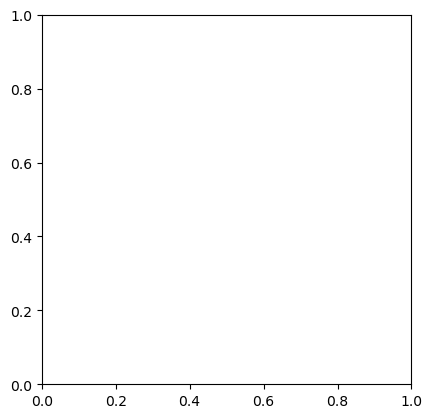

In [5]:
plt.imshow(image_prediction)

(2048, 2048, 1) [0. 1.]
(2048, 2048, 3) [  0 255]


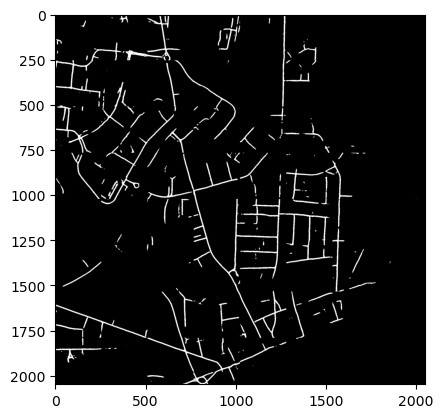

In [37]:
image_cropped = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB)
print(image_prediction.shape, np.unique(image_prediction))

image_prediction = np.squeeze(image_prediction)

pred_enc = np.zeros([image_prediction.shape[0], image_prediction.shape[1],3])

pred_enc[image_prediction == 0,:] = [255, 255, 255]
pred_enc[image_prediction == 1,:] = [0, 0, 0]
pred_enc = pred_enc.astype(np.uint8)
print(pred_enc.shape, np.unique(pred_enc))

plt.imshow(pred_enc)

In [38]:
img_save_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\Testovani model B\Massachusetts\Original\image.jpg"
pred_save_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\Testovani model B\Landcover\Zoom 1\pred zoom 2.png"

# image_cropped_save = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB)
image_cropped_save = image_cropped
image_prediction_save = cv2.cvtColor(pred_enc, cv2.COLOR_RGB2BGR)

#cv2.imwrite(img_save_path, image_cropped_save)
cv2.imwrite(pred_save_path, image_prediction_save)

True

In [6]:
# root_directory = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset"
# root_directory = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\MASSACHUSETTS_ROADS_DATASET\upravena struktura"
# root_directory = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\LANDCOVER_AI\ORIGINAL"

# root_directory = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 FULL"

image_paths = []
mask_paths = []

for path, subdirs, files in sorted(os.walk(root_directory)):
    dirname = path.split(os.path.sep)[-1]
    if dirname == "images":
        image_paths.extend([os.path.join(path, img_name) for img_name in sorted(files)])
    elif dirname == "masks":
        mask_paths.extend([os.path.join(path, mask_name) for mask_name in sorted(files)])

print("Number of tiles:",len(image_paths))


print("Image paths:")
for img_path in image_paths:
    print(img_path)

print("\nMask paths:")
for mask_path in mask_paths:
    print(mask_path)



Number of tiles: 224
Image paths:
C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 FULL\Tile 10\images\VYSK121_0.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 FULL\Tile 10\images\VYSK121_1.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 FULL\Tile 10\images\VYSK121_2.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 FULL\Tile 10\images\VYSK121_3.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 FULL\Tile 11\images\VYSK122_0.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 FULL\Tile 11\images\VYSK122_1.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentation dataset V30 FULL\Tile 11\images\VYSK122_2.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\CUSTOM_CZ_DATASET\Semantic segmentat

In [36]:
# print(len(image_paths))
# print(len(mask_paths))

if len(image_paths) == len(mask_paths):
    print("Lists of images and masks paths consist of the same number of elements:", len(image_paths))
else:
    print("ERROR: Different number of images and masks")

paths_length = len(image_paths)

accuracy_values = []
jaccard_values = []

for i in range(paths_length):

    print("\n IMAGE",i+1,"/",paths_length,"\n")
    
    mask_path = mask_paths[i]
    image_path = image_paths[i]

    if chosen_model == 1:
        image_original, image_cropped, image_prediction = predict_modelA(image_path,scale)
    elif chosen_model == 2:
        image_original, image_cropped, image_prediction = predict_modelB(image_path,scale)
    elif chosen_model == 3:
        image_original, image_cropped, image_prediction = predict_modelC(image_path,scale)
    else:
        print("ERROR: INVALID MODEL CHOSEN")


    mask_original = cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2RGB)
    mask_scaled = cv2.resize(mask_original, (mask_original.shape[1] // scale, mask_original.shape[0] // scale))

    new_height_m = image_cropped.shape[0]
    new_width_m = image_cropped.shape[1]

    mask_cropped = mask_scaled[: new_height_m, : new_width_m, :]

    # PROCESOVANI PRO MASKY DATASETU MASSACHUSETTS
    # mask_cropped = (mask_cropped < 128).astype(np.float32)
    # mask_cropped = mask_cropped[:,:,0]
    # mask_cropped = np.expand_dims(mask_cropped, axis=-1)

    # lc_m = mask_cropped[:,:,0]
    # mask_cropped = np.ones((lc_m.shape[0],lc_m.shape[1],1))
    # mask_cropped[lc_m == 4] = 0

    

    print("Cropped mask shape:", mask_cropped.shape)
    print("Cropped mask values", np.unique(mask_cropped))

    if (mask_cropped.shape[:] == image_cropped.shape[:]):
        print("MASK AND IMAGE SHAPE CONSISTENT")
    else:
        print("ERROR: DIFFERENT SHAPE FOR MASK AND IMAGE")

    mask_flat = mask_cropped.flatten()
    pred_flat = image_prediction.flatten()

    sk_acc = accuracy_score(mask_flat, pred_flat)
    sk_jac = jaccard_score(mask_flat, pred_flat, average="macro")

    accuracy_values.append(sk_acc)
    jaccard_values.append(sk_jac)

    print("Prediction accuracy:", sk_acc)
    print("Prediction jaccard index:", sk_jac)

    

Lists of images and masks paths consist of the same number of elements: 72

 IMAGE 1 / 72 

Original image shape: (644, 797, 3)
Scaled image shape: (644, 797, 3)
Predicted image shape: (640, 640, 3)
Cropped mask shape: (640, 640, 3)
Cropped mask values [ 16  41  60 110 132 152 155 169 193 226 228 246]
MASK AND IMAGE SHAPE CONSISTENT
Prediction accuracy: 0.7999560546875
Prediction jaccard index: 0.29921302786824516

 IMAGE 2 / 72 

Original image shape: (644, 797, 3)
Scaled image shape: (644, 797, 3)
Predicted image shape: (640, 640, 3)
Cropped mask shape: (640, 640, 3)
Cropped mask values [ 41 110 132 155 169 193 226 228 246]
MASK AND IMAGE SHAPE CONSISTENT
Prediction accuracy: 0.8973876953125
Prediction jaccard index: 0.31114391187031154

 IMAGE 3 / 72 

Original image shape: (644, 797, 3)
Scaled image shape: (644, 797, 3)
Predicted image shape: (640, 640, 3)
Cropped mask shape: (640, 640, 3)
Cropped mask values [ 16  41  58  60 110 132 152 155 169 193 221 226 228 246 254]
MASK AND IM

In [37]:
print(len(accuracy_values))
print(len(jaccard_values))

mean_j = np.mean(jaccard_values)
mean_a = np.mean(accuracy_values)

print(mean_a)
print(mean_j)

idm = jaccard_values.index(max(jaccard_values))
print(idm)


72
72
0.8551317308630257
0.5154101651264172
53


Original image shape: (644, 797, 3)
Scaled image shape: (644, 797, 3)
Predicted image shape: (640, 640, 3)
Cropped mask shape:  (640, 640, 3)
ACCURACY =  0.7874853515625
JACCARD INDEX =  0.5473938307441298


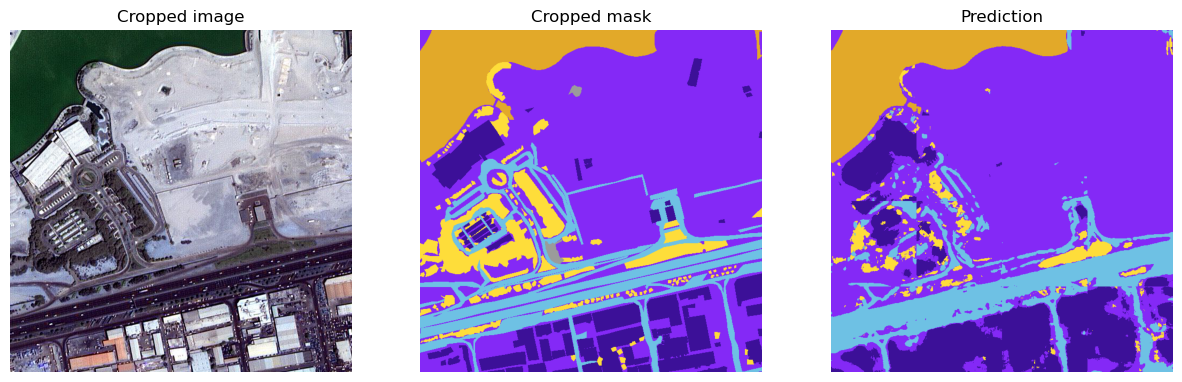

In [10]:
idw = random.randint(0, len(accuracy_values) - 1)

if chosen_model == 1:
    _ , image_sample, prediction_sample = predict_modelA(image_paths[idw],scale)
elif chosen_model == 2:
    _ , image_sample, prediction_sample = predict_modelB(image_paths[idw],scale)

mask_sample = cv2.imread(mask_paths[idw])
mask_sample = cv2.cvtColor(mask_sample, cv2.COLOR_BGR2RGB)
new_height_m = image_cropped.shape[0]
new_width_m = image_cropped.shape[1]

mask_scaled = cv2.resize(mask_sample, (mask_sample.shape[1] // scale, mask_sample.shape[0] // scale))

new_height_m = prediction_sample.shape[0]
new_width_m = prediction_sample.shape[1]

mask_sample = mask_scaled[: new_height_m, : new_width_m, :]

print("Cropped mask shape: ", mask_sample.shape)


print("ACCURACY = ", accuracy_values[idw])
print("JACCARD INDEX = ", jaccard_values[idw])

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(image_sample)
plt.title('Cropped image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_sample)
plt.title('Cropped mask')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(prediction_sample, cmap='binary')
plt.title('Prediction')
plt.axis('off')

plt.show()

In [11]:
print(accuracy_score(mask_sample.flatten(), prediction_sample.flatten()))
print(jaccard_score(mask_sample.flatten(), prediction_sample.flatten(), average='macro'))

0.7874853515625
0.5473938307441298
